In [1]:
import pandas as pd
import pygmt
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2


In [2]:
df_SAM_merge = pd.read_csv('/Users/simon/GIT/bx/andes//datafiles/geochem_merge_20230104.csv')
df_SAM_merge = gpd.GeoDataFrame(df_SAM_merge, geometry=gpd.points_from_xy(df_SAM_merge.Longitude, df_SAM_merge.Latitude), crs=4326)

df_SAM_merge = df_SAM_merge[~np.isnan(df_SAM_merge.age)]


In [3]:
gdf = gpd.read_file('/Users/simon/GIT/Tectonic/global_tectonics-main/plates&provinces/global_gprv_wage.shp')

gdf = gdf[gdf['continent']=='South America']

cordillera = gdf[gdf['lastorogen'].str.contains('Cordilleran', na=False)]
terra_australis = gdf[gdf['lastorogen'].str.contains('Australis', na=False)]

cordillera = cordillera.cx[-100:-50, -60:20]
terra_australis = terra_australis.cx[-100:-50, -60:20]

df_SAM_merge = df_SAM_merge.clip(pd.concat([cordillera, terra_australis]))

df_SAM_merge

/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/geopandas/geodataframe.py:2233: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


,Longitude,Latitude,age,source_study,sio2,mgo,feo_tot,cao,k2o,tio2,...,tl_ppm,tm_ppm,w_ppm,v_ppm,u_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm,geometry
29806,-70.501944,-24.168058,183.1000,Jara et al [2021],51.86,4.02,10.300,6.70,2.65,1.76,...,NaN,NaN,NaN,355.00,NaN,49.00,3.42,NaN,227.0,POINT (-70.50194 -24.16806)
30817,-70.501944,-24.168058,183.1000,Oliveros et al [2020],52.71,3.68,8.200,6.53,2.81,1.50,...,NaN,NaN,NaN,261.00,NaN,38.00,4.05,NaN,210.0,POINT (-70.50194 -24.16806)
30813,-70.501944,-24.168058,183.1000,Oliveros et al [2020],54.03,3.18,10.780,5.40,2.49,1.70,...,NaN,NaN,NaN,310.00,NaN,50.00,4.46,NaN,251.0,POINT (-70.50194 -24.16806)
30818,-70.501944,-24.168058,183.1000,Oliveros et al [2020],53.85,3.42,8.200,8.42,1.71,1.15,...,NaN,NaN,NaN,275.00,NaN,35.00,4.40,NaN,171.0,POINT (-70.50194 -24.16806)
29801,-70.501939,-23.841671,183.1000,Jara et al [2021],50.33,8.87,8.450,11.53,0.37,0.41,...,NaN,NaN,NaN,118.00,NaN,14.00,1.20,36.0,72.0,POINT (-70.50194 -23.84167)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,-69.152220,-18.198620,0.1940,Gard et al [2019],NaN,NaN,NaN,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-69.15222 -18.19862)
4808,-69.152220,-18.198620,0.1940,Gard et al [2019],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-69.15222 -18.19862)
4815,-69.152220,-18.198620,0.1540,Gard et al [2019],59.25,3.02,5.355,5.29,3.20,1.17,...,NaN,NaN,NaN,134.00,NaN,18.00,NaN,98.0,254.0,POINT (-69.15222 -18.19862)
22474,-69.141050,-18.197983,0.0300,Gard et al [2019],61.70,2.26,4.869,4.29,3.41,1.11,...,NaN,0.20,NaN,116.55,NaN,13.25,0.90,95.9,210.5,POINT (-69.14105 -18.19798)


In [4]:
source_studies = df_SAM_merge.source_study.unique()
#source_studies.sort

colors = sns.color_palette(None, len(source_studies))

source_studies = sorted(list(source_studies))

source_studies


['Aragon et al [2011]',
 'Cardona et al [2018]',
 'Castro et al [2021]',
 'Demouy et al [2019]',
 'Echuarren et al [2017]',
 'Fernandez-Paz et al [2020]',
 'Gard et al [2019]',
 'Gregori et al [2020]',
 'Herve et al [2007]',
 'Hildebrando et al [2019]',
 'Ianelli et al [2017]',
 'Jara et al [2021]',
 'Leon et al [2021]',
 'Martinez Dopico et al [2019]',
 'Martinez-Ardila et al []',
 'Mertinez et al [2018]',
 'Miskovic et al [2009]',
 'Nathwani et al [2021]',
 'Navarrette',
 'Oliveros et al [2020]',
 'Richards et al [2017]',
 'Spikings et al [2015]']

pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)


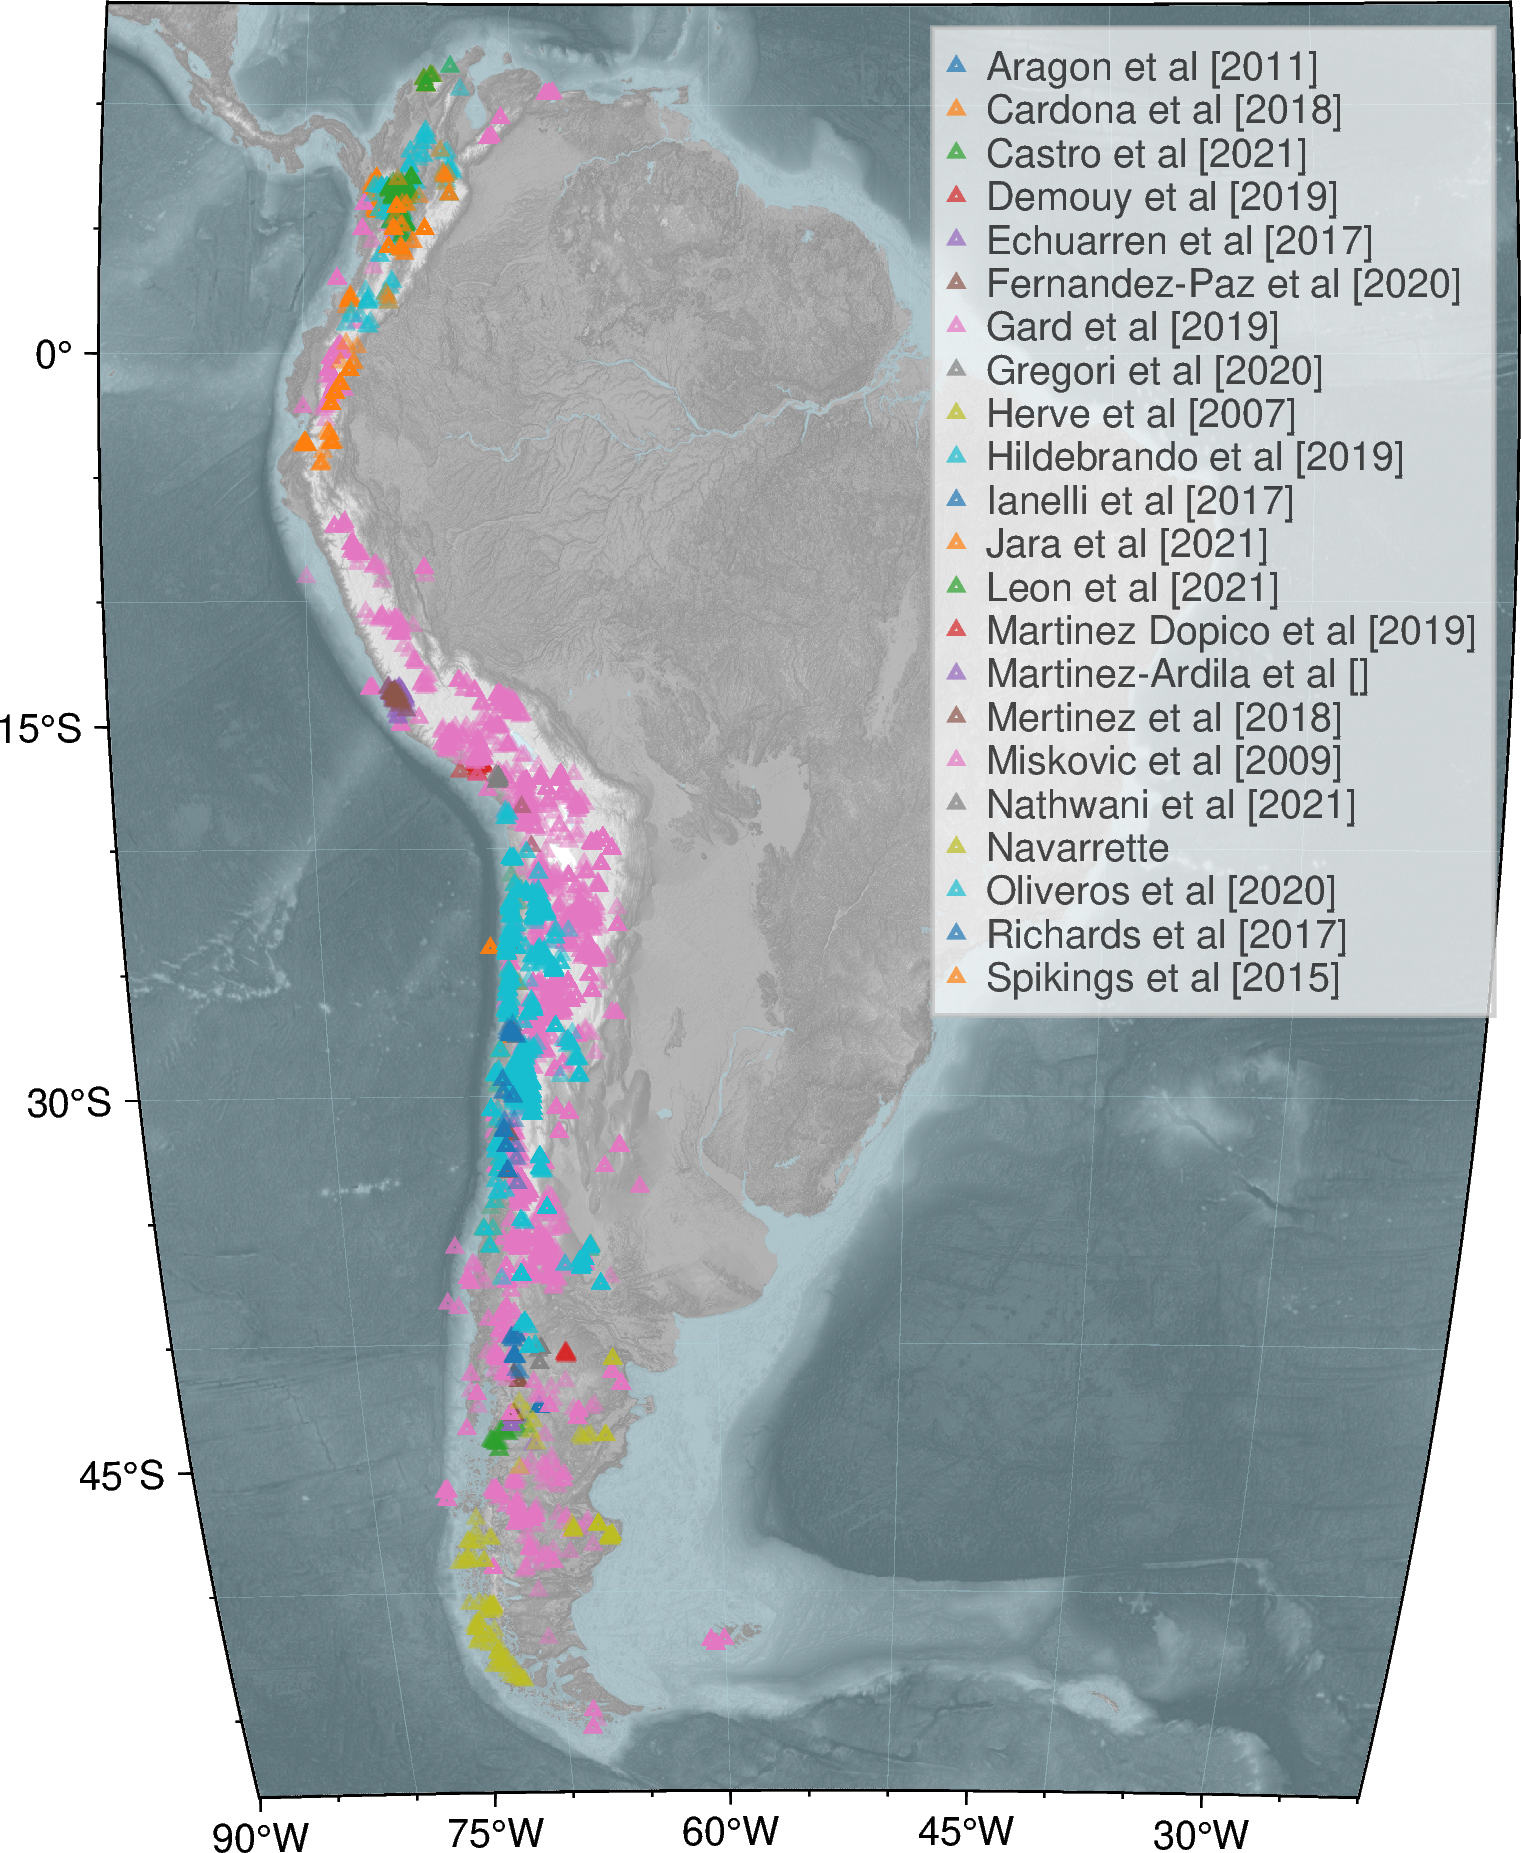

In [5]:
region = [-90,-20,-58,14]


topo_grid = pygmt.datasets.load_earth_relief(resolution='02m', region=region)
dgrid = pygmt.grdgradient(grid=topo_grid, radiance=[290, 10])

style='t0.12c'
transparency = 50

fig = pygmt.Figure()
fig.basemap(projection='R12c', region=region, frame='afg')

pygmt.makecpt(cmap="gray", series=[-5000, 3000]) #, reverse=True)
fig.grdimage(grid=topo_grid, cmap=True)

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    cmap=True,
    transparency=80,
)

fig.coast(water='lightblue', transparency=50)

#fig.plot(x=subset.geometry.x, y=subset.geometry.y, style=style, pen='1p,red', transparency=transparency, label='Samples')
for study_name,color in zip(source_studies, colors):
    subset = df_SAM_merge[df_SAM_merge['source_study']==study_name]
    fig.plot(x=subset.geometry.x, y=subset.geometry.y, style=style, 
             pen='1p,{:d}/{:d}/{:d}'.format(int(color[0]*255),int(color[1]*255),int(color[2]*255)), 
             transparency=transparency, label=study_name)

fig.legend(position="JTR+jTR+o0.2c", box='+gwhite+p1p,grey', transparency=30)

fig.show(width=800)


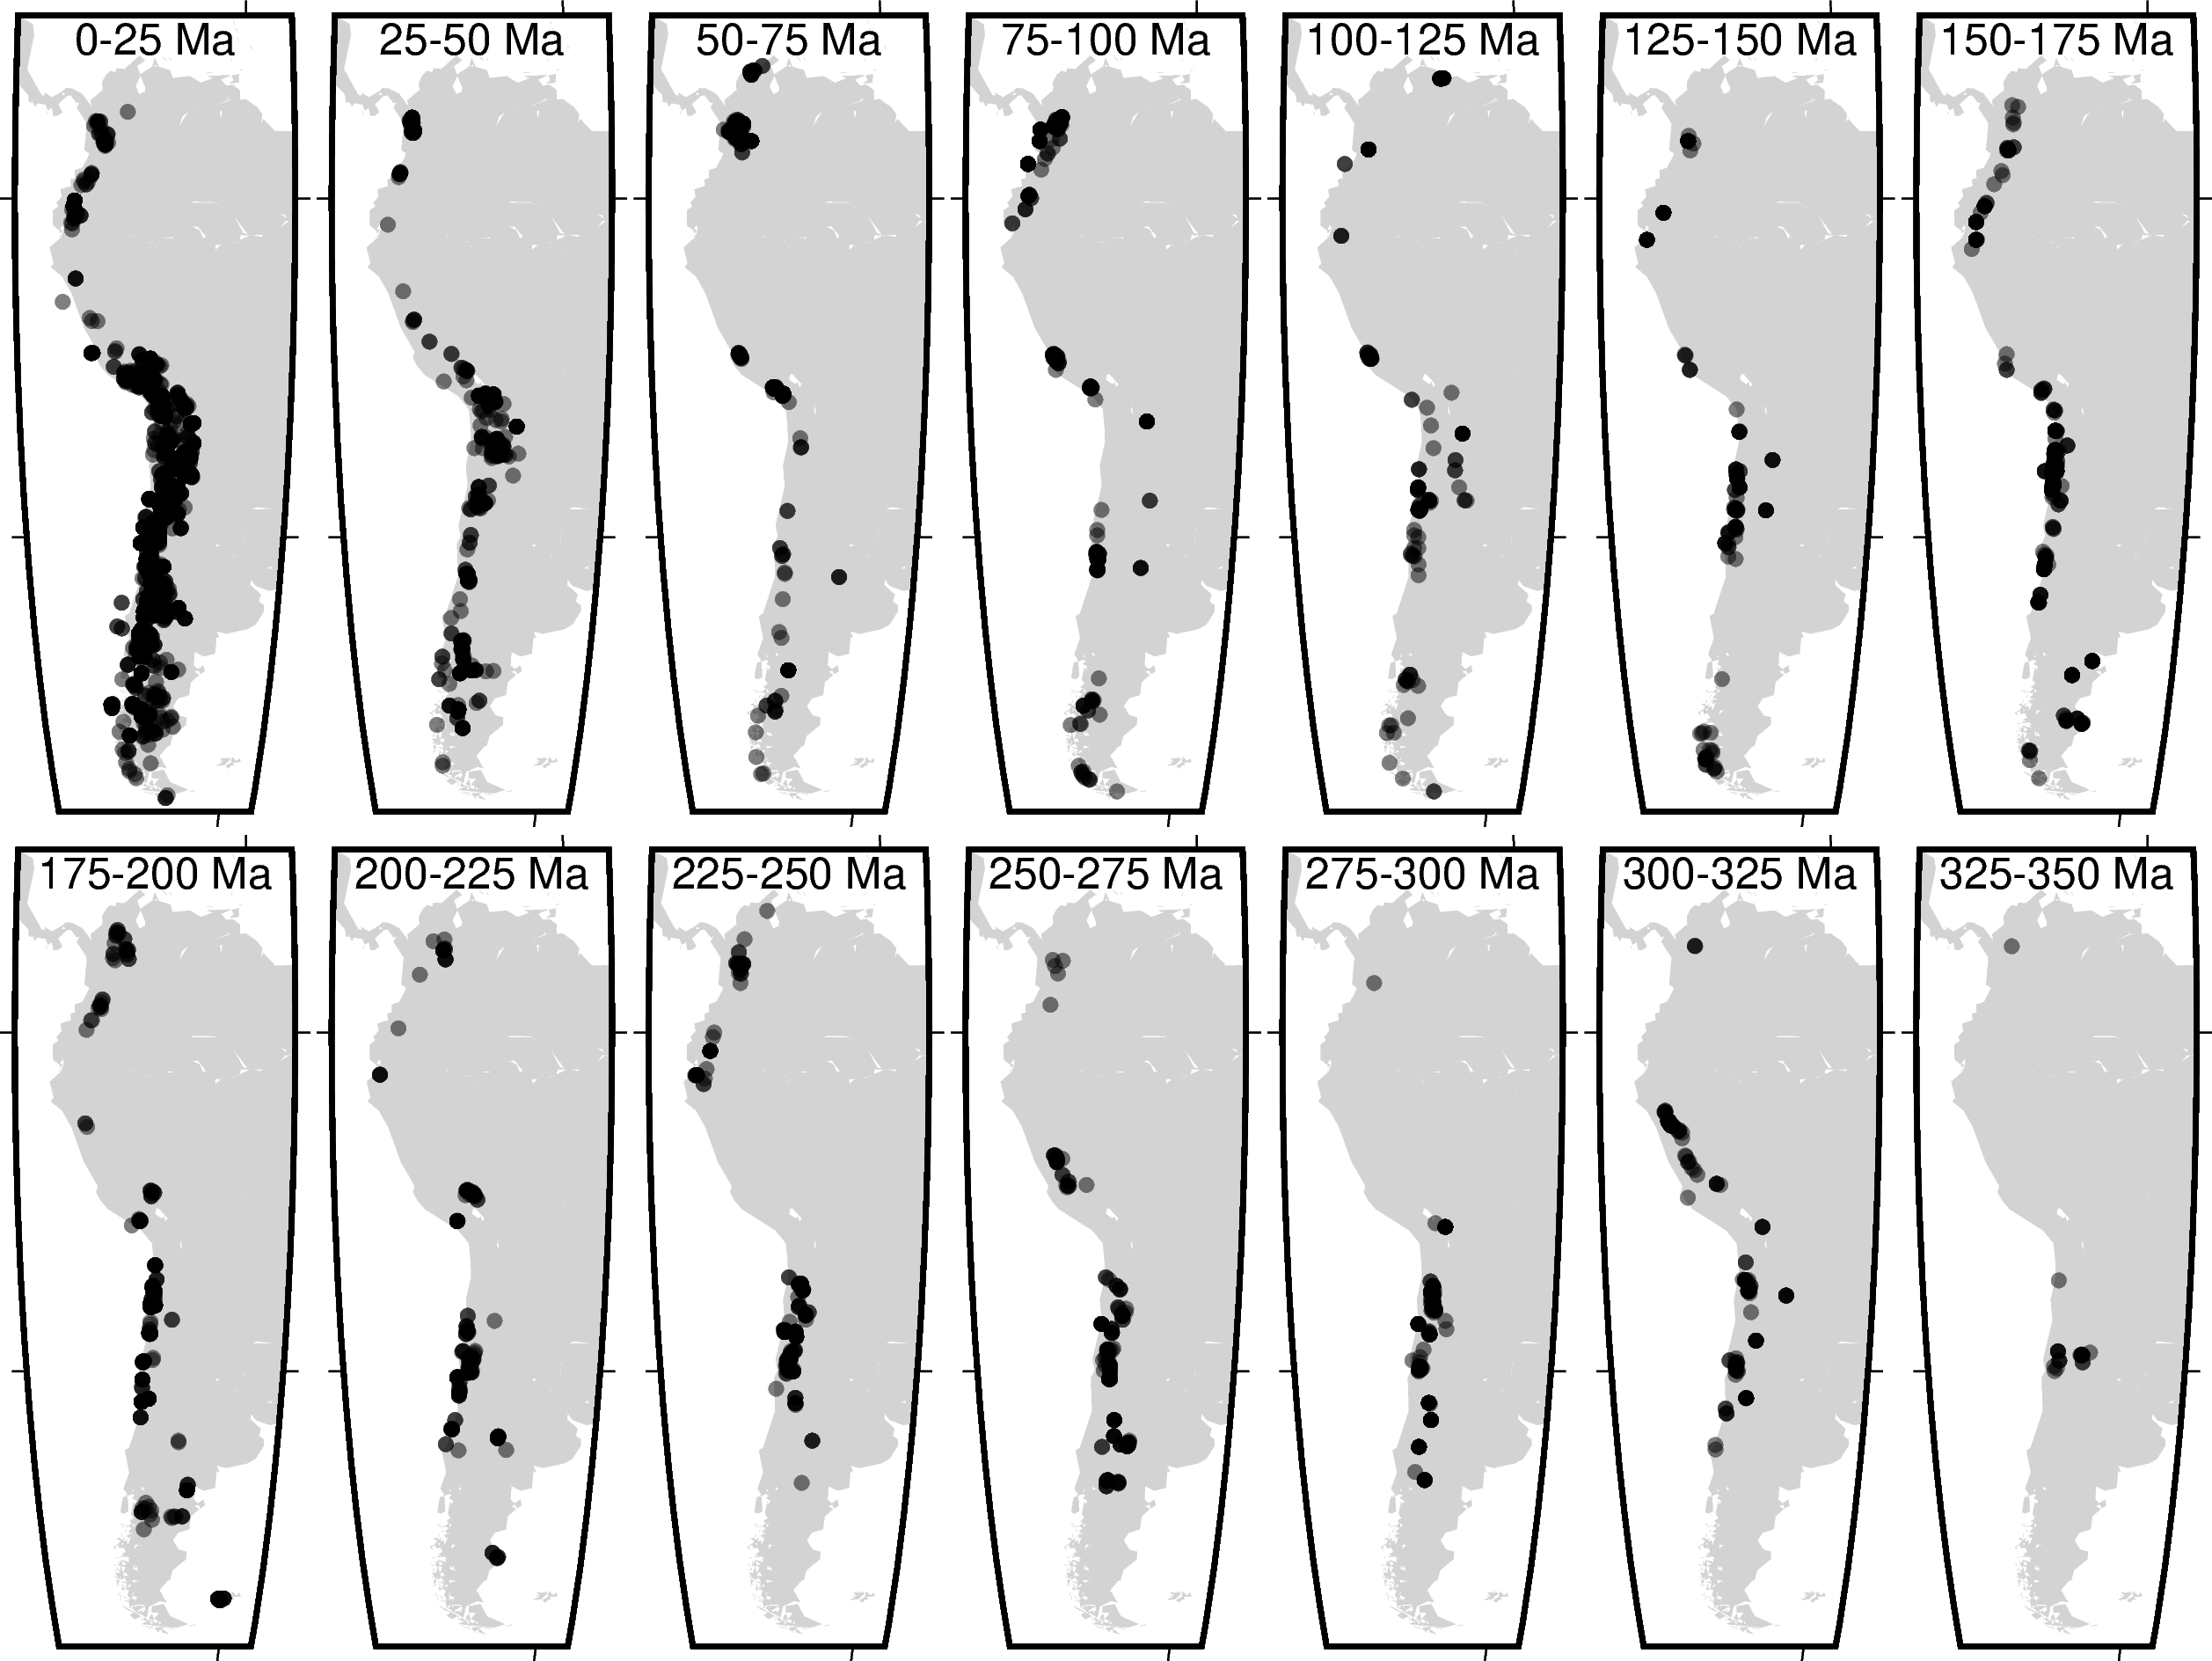

In [33]:
region = [-85,-55,-57,16]
projection = 'W2.7c'

fig = pygmt.Figure()
with fig.subplot(nrows=2, ncols=7, figsize=("21c", "15.7c"), frame="lrtb"):
    for index,start_age in enumerate(np.arange(0,350,25)):  # row number starting from 0     
        with fig.set_panel(panel=index):  # sets the current panel
            
            fig.coast(land="lightgrey", region=region, projection=projection)

            subset2=df_SAM_merge[(df_SAM_merge.age>=start_age) & (df_SAM_merge.age<start_age+25.)]

            fig.plot(x=subset2.Longitude, y=subset2.Latitude, style='c0.15c', color='black',
                     region=region, projection=projection, transparency=50)
            
            fig.basemap(frame=['a','wesn'], region=region, projection=projection)
            
            fig.text(x=-70, y=14, text='{:0.0f}-{:0.0f} Ma'.format(start_age,start_age+25.), 
                     font='12p', no_clip=True, region=region, projection=projection)

fig.show(width=1000)


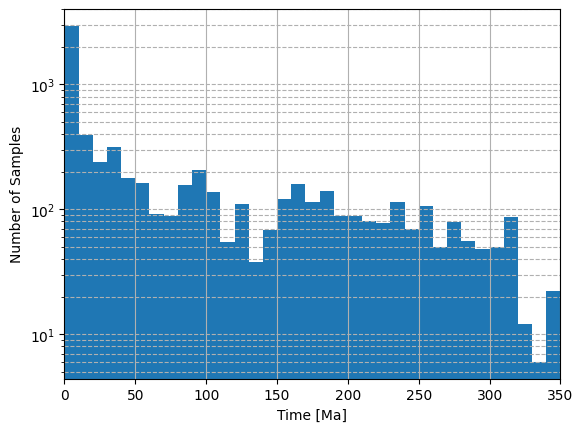

In [36]:
fig,ax = plt.subplots()
ax.hist(df_SAM_merge.age, bins=np.arange(0,351,10))
ax.set_yscale('log')
ax.grid()
ax.grid(which='both', axis='y', linestyle='--')
ax.set_xlim(0,350)
ax.set_xlabel('Time [Ma]')
ax.set_ylabel('Number of Samples')
plt.show()
